In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [54]:
data = pd.read_csv("Car.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
# Transform the column(string --> int) ******************************************************* string 불가능?? 이응..

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['buying'] = le.fit_transform(data.buying)
data['maint'] = le.fit_transform(data.maint)
data['lug_boot'] = le.fit_transform(data.lug_boot)
data['safety'] = le.fit_transform(data.safety)
data['doors'] = le.fit_transform(data.doors)
data['persons'] = le.fit_transform(data.persons)

---
df['gender_factor'] = pd.factorize(df.gender)[0]

>>> df
   gender  gender_factor
0  Female              0
1    Male              1
2    Male              1
3    Male              1
4  Female              0
5  Female              0
6    Male              1
7  Female              0
8  Female              0
9  Female              0

---

In [60]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


In [0]:

sel_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
x = data[sel_names]
y = data['class']

In [81]:
x.shape, y.shape

((1728, 6), (1728,))

In [82]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [0]:
x1 = x.values
y1 = y.values.reshape(-1,1)

In [84]:
x1.shape, y1.shape

((1728, 6), (1728, 1))

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size=0.25, random_state=0)

In [0]:
DecisionTreeClassifier?

In [87]:
# DecisionTree

dstClf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
dstClf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [88]:
yResult = dstClf.predict(xtest)
yResult

array(['acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',

In [89]:
from sklearn import metrics

metrics.accuracy_score(ytest, yResult)

0.7638888888888888

In [0]:
#*********************************************************************************************************************
import os
import graphviz
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

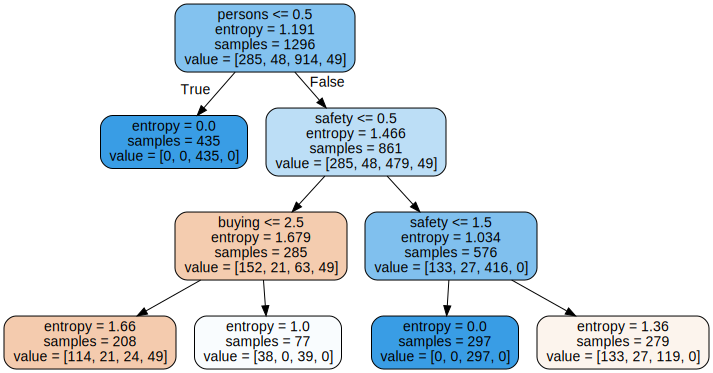

In [100]:
dot_data = tree.export_graphviz(dstClf, out_file=None, filled=True, rounded=True,
                               feature_names=list(data.columns.values[:-1]))
graph = graphviz.Source(dot_data)
graph